

# <font color='Grey'> Métrica de Avaliação das Máquinas Preditivas- AUC_ROC  </font>

#### **Obs**: Aprendizagem Supervisionada Binária


**O que veremos nessa aula?**

* Componentes da Curva ROC 

    - Sensibilidade  - (TPR), 

    - FPR            - (taxa de Falso Positivo), 

    - Especificidade - (taxa de verdadeiro Negativo)  

    - FNR            - (Taxa de Falso Negativo)

* O que é a curva AUC-ROC?
* Como funciona a curva AUC-ROC?
* AUC-ROC em Python na Prática
 

![alt text](https://miro.medium.com/max/1028/1*tMIpJr1H84Pdb1-UxtCbCw.gif)

![alt text](https://miro.medium.com/max/2400/1*Dz0AhFrL2U-Y3FJA8RUpKg.gif)




#Entendendo os Componentes da Curva ROC

## ![alt text](https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png)

## TPR (taxa de verdadeiro positivo)/  Sentitividade ou   Recall

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/sensitivity.gif)

## FPR (taxa de falso positivo)

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/FPR.gif)

### Especificidade

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/Specificity.gif)

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Basic-Confusion-matrix.png)

### FNR - Taxa de Falso Negativo

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/FNR.gif)

# AUC - Area Under the Curve (ROC)

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC1.png)

### 1 - Problema de Negócio: Calcular a AUC_ROC

### 2 - Análise/Fonte de Dados

In [1]:
# auc roc curve

from sklearn.datasets import make_classification # Carrega uma massa de dados/ make_classification
from sklearn.model_selection import train_test_split # Separa dados de treinamento e teste



### 3 - Pré-Processamento

In [2]:
# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)





In [3]:
X_train

array([[ 1.80184652e+00, -3.05409573e-01, -1.36181156e+00, ...,
         1.75838081e+00,  6.65014887e-01, -1.11518375e+00],
       [ 2.77004619e-01, -8.70119969e-01,  9.96219012e-02, ...,
         1.11306528e+00, -1.27405890e+00,  1.87486996e-03],
       [-7.13887927e-01, -2.68732324e-01,  1.25697709e-01, ...,
         4.36011401e-01, -1.52041444e+00, -8.35442999e-01],
       ...,
       [-5.90565478e-01, -9.83420382e-01, -5.95570642e-01, ...,
         2.08745145e-03, -4.04990235e-01, -1.77286149e-03],
       [-2.56158789e-01,  7.26480959e-01, -1.42564512e+00, ...,
         1.18806159e+00, -6.75866294e-01, -6.44778511e-02],
       [ 6.02483848e-01,  1.36921840e+00,  6.36990314e-01, ...,
         6.51715759e-01, -7.79588362e-01, -3.99418767e-01]])

### 4 - Criação da Máquina Preditiva

In [4]:
# train models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)




### 5 - Avaliação da Máquina

In [5]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)




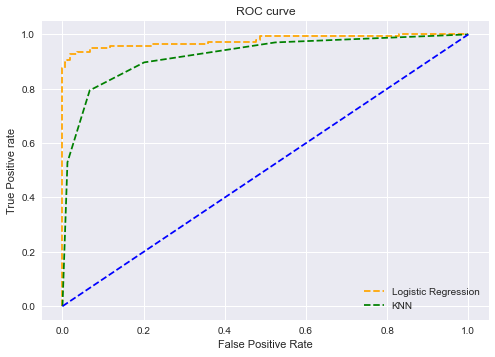

In [6]:
# multi-class classification
import matplotlib.pyplot as plt
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [7]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157



![alt text](https://www.spectrumnews.org/wp-content/uploads/2016/08/fig-3-1.gif)


# Fim